#Metas y Rentabilidad de MOOPS

En **Moops** se tiene fijo que al mes se tengan unos ingresos claros respecto al mes, estos podria considerarse de las siguiente forma

- Meta mensual estandar: **$15,000**

- En temporada alta: **$20,000**

Por lo que calcularemos las ventas relaes por mes

##Parte 1: Instalar e Importar Librerias

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install -U -q PyDrive

Importando librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

###Cargaremos y Previsualizaremos el conjunto de Datos, en este caso el excel

In [ ]:
# Autenticación
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Replace with the correct file ID from the URL
file_id = "1LYZWcK8RHVM9YVwXoZgQQWqjy9KBH1og2di2v1O2FSI"
downloaded = drive.CreateFile({'id': file_id})

# Export the file to xlsx format before downloading
downloaded.GetContentFile('Ventas_Moops_2024_2025.xlsx', mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')

# Leer el archivo
import pandas as pd
df = pd.read_excel("Ventas_Moops_2024_2025.xlsx")
df.head()

,Diseños pedidos,Modelo de celular,Modelo numero,Talla,Tamaño,Diseño completos,Anticipo,Pagos,Tipo de Fundas,Color,Cliente,Producto,Lugar,Fecha de entrega,Red social de venta,Precio,Lugares de Envio
0,RICK PEPINILLO,Iphone,16,NaN,NaN,si,si,COMPLETO,Marco,Transparente,Alfredo,Funda,CDMX,2024-01-18,Facebook,320,NaN
1,Ferxxo,Iphone,13,NaN,NaN,si,si,COMPLETO,Acrigel,Transparente,Alfredo,Funda,CDMX,2024-01-15,Facebook,200,NaN
2,PAISAJE CON ERNESTO,Iphone,14,NaN,NaN,no,si,COMPLETO,Marco,Transparente,Ricardo,Funda,CDMX,2024-01-16,Facebook,320,NaN
3,PAISAJE CON ERNESTO,Iphone,14,NaN,NaN,no,si,COMPLETO,Marco,Transparente,Ricardo,Funda,CDMX,2024-03-14,Facebook,320,NaN
4,Ferxxo,Iphone,14,NaN,NaN,si,si,COMPLETO,Reforzada,Transparente,yayoo,Funda,CDMX,2024-04-10,Facebook,290,NaN


###Exploraremos los datos que se encuentran en la tabla, los datos necesarios e importantes

Visualizaremos los tipos de datos

In [ ]:
df.dtypes

,0
Diseños pedidos,object
Modelo de celular,object
Modelo numero,object
Talla,object
Tamaño,object
Diseño completos,object
Anticipo,object
Pagos,object
Tipo de Fundas,object
Color,object


**Analizaremos los nombres de las columnas para usarlas**

In [ ]:
df.columns

Index(['Diseños pedidos', 'Modelo de celular', 'Modelo numero', 'Talla',
       'Tamaño', 'Diseño completos', 'Anticipo', 'Pagos', 'Tipo de Fundas',
       'Color', 'Cliente', 'Producto ', 'Lugar', 'Fecha de entrega',
       'Red social de venta', 'Precio', 'Lugares de Envio'],
      dtype='object')

Renombraremos la columna Unnamed: 3 a Tamaño

In [ ]:
#RENOMBRAREMOS COLUMNA
df.rename(columns={'Unnamed:3':'Tamaño'},inplace=True)


##

## Ventas reales por mes

In [ ]:
#Analizaremos las ventas reales
# Asegura que la columna 'Fecha de entrega' sea tipo datetime
df['Fecha de entrega']=pd.to_datetime(df['Fecha de entrega'])
# Creamos una columna para el mes y el año
df['Mes']=df['Fecha de entrega'].dt.month
# Agrupamos por mes y sumamos las ventas
ventas_mensuales = df.groupby('Mes')['Precio'].sum().reset_index()
ventas_mensuales.columns = ['Mes', 'Ventas Reales']
#Añadimos la meta estandar
ventas_mensuales['Meta esperada']=15000
# Calculamos el cumplimiento
ventas_mensuales['% Cumplimiento'] = (ventas_mensuales['Ventas Reales'] / ventas_mensuales['Meta esperada']) * 100
ventas_mensuales


,Mes,Ventas Reales,Meta esperada,% Cumplimiento
0,1,15300,15000,102.000000
1,2,8650,15000,57.666667
2,3,9100,15000,60.666667
3,4,22350,15000,149.000000
4,5,3190,15000,21.266667
5,6,1450,15000,9.666667
6,7,3000,15000,20.000000
7,10,4940,15000,32.933333
8,12,23330,15000,155.533333


Text(0, 0.5, 'Ventas Reales')

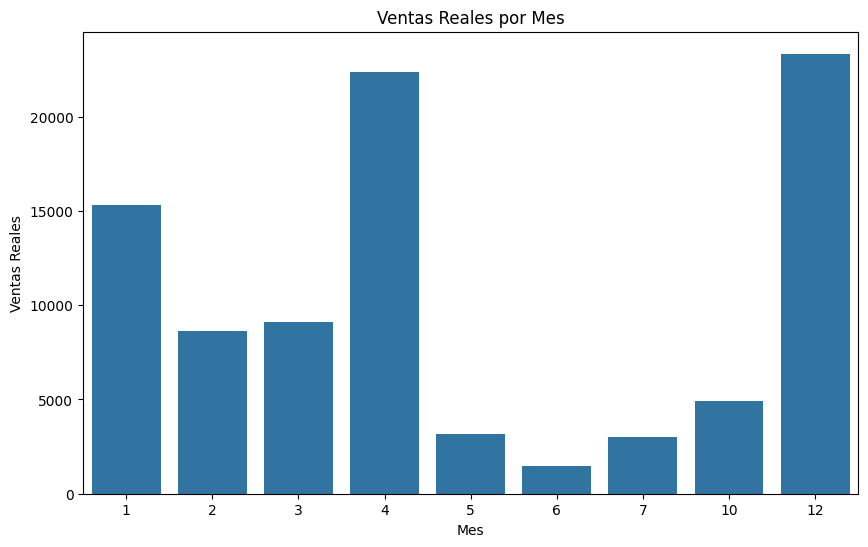

In [ ]:
#gradficamos las ventas mensuales
plt.figure(figsize=(10, 6))
sns.barplot(x='Mes', y='Ventas Reales', data=ventas_mensuales)
plt.title('Ventas Reales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Reales')

Se puede observar que si se cumplio la meta en ciertos meses, por ejemplo enero, abril y diciembre, sin embargo los otros meses son muy bajos, demasiado que se podria identificar que se puede hacer para esos meses